In [1]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt

In [120]:
point = (52.469501, 13.341690)
dist = 250

In [121]:
buildings = gpd.read_file(momepy.datasets.get_path('bubenec'),
                          layer='buildings')
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
buildings = ox.project_gdf(gdf)
buildings['uID'] = np.arange(len(buildings))

In [122]:
buildings.uID

32844758       0
32844761       1
42773121       2
42773130       3
42773135       4
            ... 
396510801    212
606845623    213
4148015      214
4148016      215
4179866      216
Name: uID, Length: 217, dtype: int32

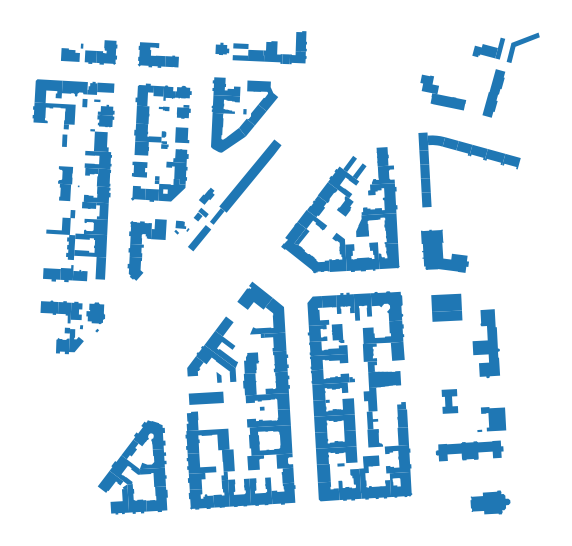

In [123]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [124]:
blg_area = momepy.Area(buildings)
buildings['area'] = blg_area.series

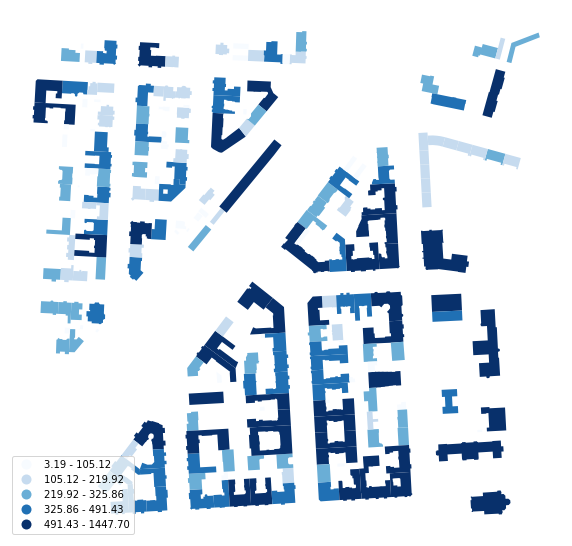

In [125]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot('area', ax=ax, legend=True, scheme='quantiles', cmap='Blues',
               legend_kwds={'loc': 'lower left'})
ax.set_axis_off()
plt.show()

In [126]:
blg_ERI = momepy.EquivalentRectangularIndex(buildings)

In [127]:
blg_ERI = momepy.EquivalentRectangularIndex(buildings, areas='area')
buildings['eri'] = blg_ERI.series

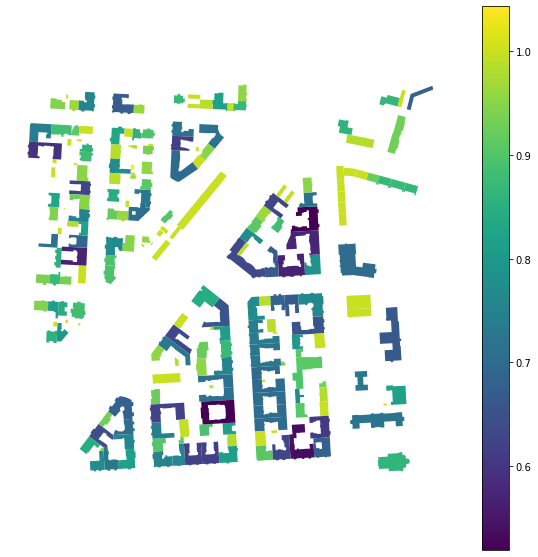

In [128]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot('eri', ax=ax, legend=True)
ax.set_axis_off()
plt.show()

In [138]:
import osmnx as ox

point = (52.469501, 13.341690)
dist = 250
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_projected = ox.project_gdf(gdf)

buildings = momepy.preprocess(gdf_projected, size=30,
                              compactness=True, islands=True)
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)
tessellation = momepy.Tessellation(buildings, unique_id='uID', limit=limit).tessellation

Changing geometry:   0%|          | 0/8 [00:00<?, ?it/s]

Loop 1 out of 2.


Identifying changes: 100%|██████████| 197/197 [00:00<00:00, 16387.57it/s]
Changing geometry: 0it [00:00, ?it/s]


Loop 2 out of 2.
Inward offset...
Discretization...


 12%|█▏        | 23/197 [00:00<00:00, 229.84it/s]

Generating input point array...


100%|██████████| 197/197 [00:00<00:00, 267.96it/s]


Generating Voronoi diagram...


Vertices to Polygons:  11%|█         | 3994/37512 [00:00<00:00, 39910.16it/s]

Generating GeoDataFrame...


Vertices to Polygons: 100%|██████████| 37512/37512 [00:00<00:00, 40141.08it/s]


Dissolving Voronoi polygons...


  0%|          | 0/36 [00:00<?, ?it/s]

Preparing limit for edge resolving...
Building R-tree...
Identifying edge cells...
Cutting...


100%|██████████| 36/36 [00:00<00:00, 1089.99it/s]


In [143]:
tesselation.head()

NameError: name 'tesselation' is not defined

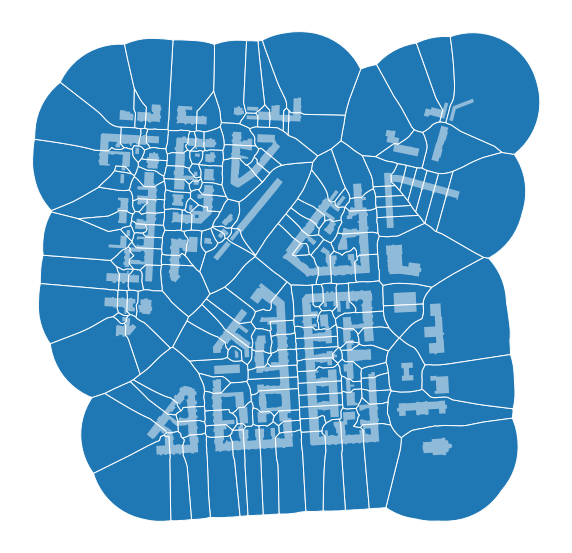

In [144]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, edgecolor='white')
buildings.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()

In [150]:
tessellation['area'] = momepy.Area(tessellation).series
buildings['area'] = momepy.Area(buildings).series
tess_car = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID')
tessellation['CAR'] = tess_car.series

In [151]:
coverage = momepy.AreaRatio(tessellation, buildings, left_areas=tessellation.area,
                            right_areas='area', unique_id='uID')
tessellation['CAR'] = coverage.series

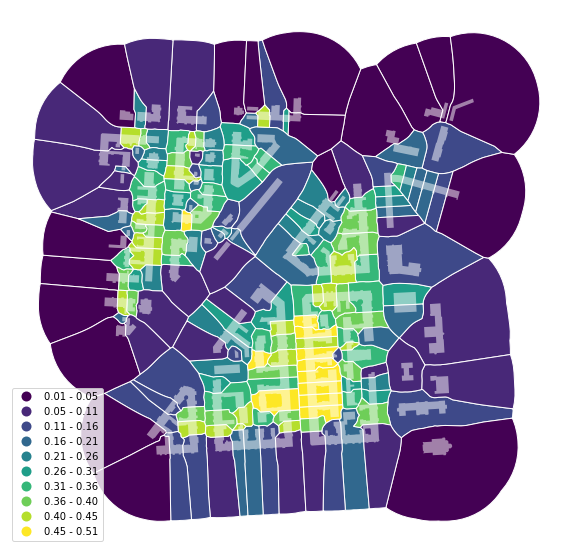

In [152]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot('CAR', ax=ax, edgecolor='white', legend=True, scheme='NaturalBreaks', k=10, legend_kwds={'loc': 'lower left'})
buildings.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()

In [153]:
streets_graph = ox.graph_from_point(point, distance=dist, network_type='walk')
streets_graph = ox.project_graph(streets_graph)
edges = ox.save_load.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

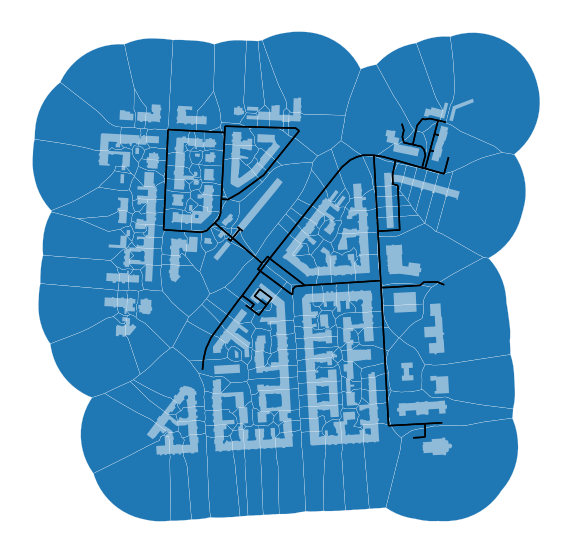

In [155]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, edgecolor='white', linewidth=0.2)
buildings.plot(ax=ax, color='white', alpha=.5)
edges.plot(ax=ax, color='black')
ax.set_axis_off()
plt.show()


In [146]:
profile = momepy.StreetProfile(streets, buildings)

100%|██████████| 35/35 [00:03<00:00, 10.17it/s]


In [157]:
edges['width'] = profile.w
edges['openness'] = profile.o

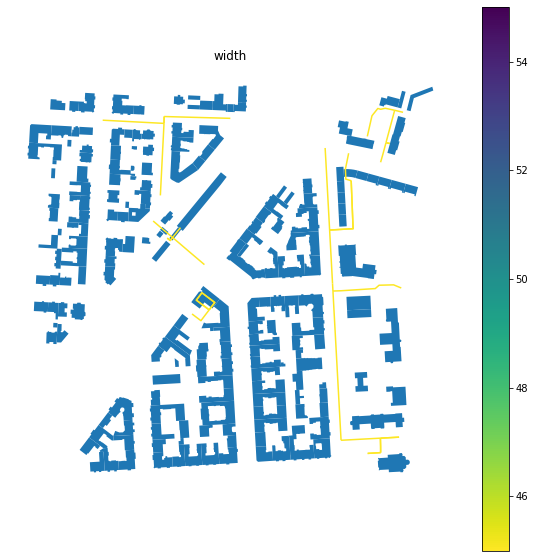

In [158]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax)
edges.plot('width', ax=ax, legend=True, cmap='viridis_r')
ax.set_axis_off()
ax.set_title('width')
plt.show()

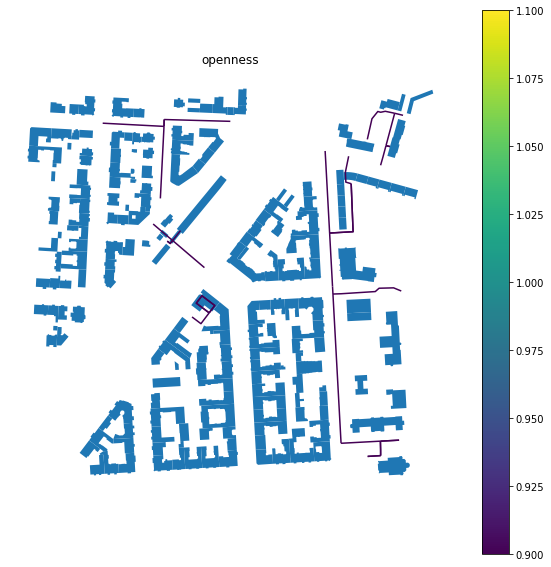

In [159]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax)
edges.plot('openness', ax=ax, legend=True)
ax.set_axis_off()
ax.set_title('openness')
plt.show()

In [160]:
import osmnx as ox

gdf = ox.footprints.footprints_from_point(point=point, distance=500)
gdf_projected = ox.project_gdf(gdf)


In [161]:


buildings = momepy.preprocess(gdf_projected, size=30,
                              compactness=True, islands=True)
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)
tess = momepy.Tessellation(buildings, unique_id='uID', limit=limit)
tessellation = tess.tessellation

Loop 1 out of 2.


Changing geometry: 100%|██████████| 34/34 [00:00<00:00, 120.48it/s]


Loop 2 out of 2.


Changing geometry: 100%|██████████| 3/3 [00:00<00:00, 166.54it/s]


Inward offset...
Discretization...


  4%|▍         | 33/783 [00:00<00:02, 320.11it/s]

Generating input point array...


100%|██████████| 783/783 [00:02<00:00, 352.87it/s]


Generating Voronoi diagram...


Vertices to Polygons:   0%|          | 0/139433 [00:00<?, ?it/s]

Generating GeoDataFrame...


Vertices to Polygons: 100%|██████████| 139433/139433 [00:03<00:00, 38558.40it/s]


Dissolving Voronoi polygons...


 27%|██▋       | 28/105 [00:00<00:00, 279.80it/s]

Preparing limit for edge resolving...
Building R-tree...
Identifying edge cells...


100%|██████████| 73/73 [00:00<00:00, 1042.27it/s]


Cutting...


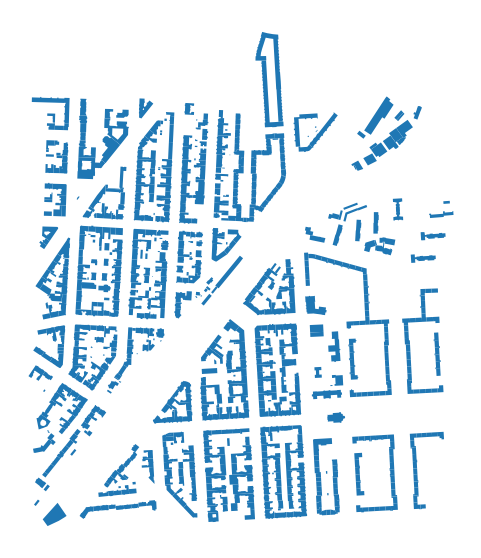

In [162]:
f, ax = plt.subplots(figsize=(10, 10))
gdf_projected.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [163]:
gdf_ERI = momepy.EquivalentRectangularIndex(gdf_projected)
gdf_projected['eri'] = gdf_ERI.series

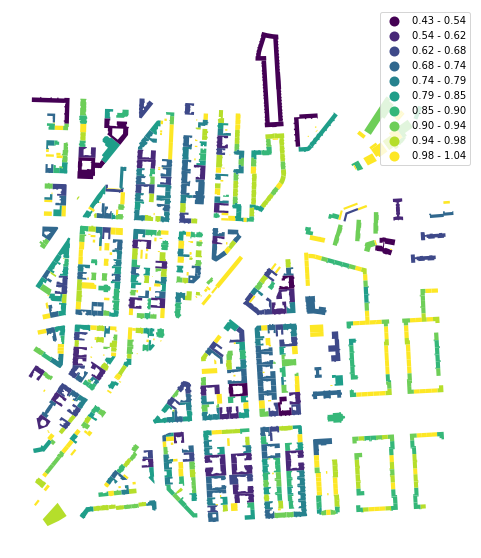

In [165]:
f, ax = plt.subplots(figsize=(10, 10))
gdf_projected.plot('eri', ax=ax, legend=True, scheme='NaturalBreaks', k=10)
ax.set_axis_off()
plt.show()

In [25]:
buildings = momepy.preprocess(gdf_projected, size=30,
                              compactness=True, islands=True)

Loop 1 out of 2.


Changing geometry: 100%|██████████| 249/249 [00:04<00:00, 56.78it/s]


Loop 2 out of 2.


Changing geometry: 100%|██████████| 29/29 [00:00<00:00, 56.19it/s]


In [167]:
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)

In [168]:
tessellation = momepy.Tessellation(buildings, unique_id='uID', limit=limit)
tessellation_gdf = tessellation.tessellation

Inward offset...
Discretization...


  4%|▍         | 34/783 [00:00<00:02, 336.40it/s]

Generating input point array...


100%|██████████| 783/783 [00:02<00:00, 346.37it/s]


Generating Voronoi diagram...


Vertices to Polygons:   0%|          | 0/139433 [00:00<?, ?it/s]

Generating GeoDataFrame...


Vertices to Polygons: 100%|██████████| 139433/139433 [00:03<00:00, 36539.96it/s]


Dissolving Voronoi polygons...


 39%|███▉      | 41/105 [00:00<00:00, 405.66it/s]

Preparing limit for edge resolving...
Building R-tree...
Identifying edge cells...


100%|██████████| 73/73 [00:00<00:00, 1105.07it/s]


Cutting...


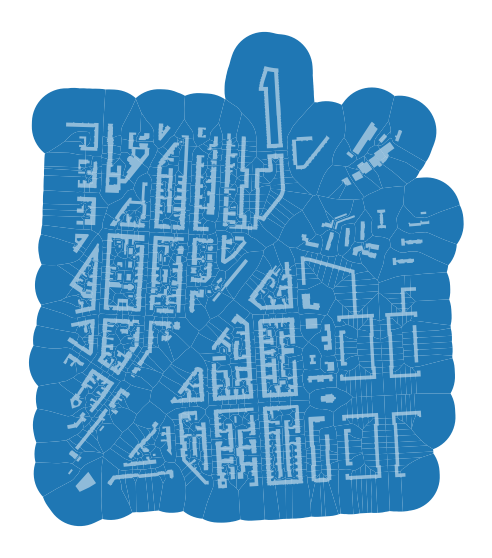

In [169]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation_gdf.plot(ax=ax)
buildings.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()

In [170]:
blg_cc = momepy.CircularCompactness(buildings)
buildings['circular_com'] = blg_cc.series

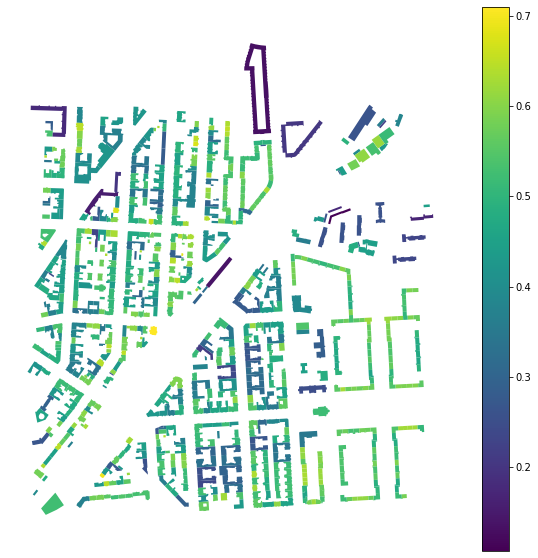

In [171]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='circular_com', legend=True, cmap='viridis')
ax.set_axis_off()
plt.show()

In [172]:
blg_elongation = momepy.Elongation(buildings)
buildings['elongation'] = blg_elongation.series

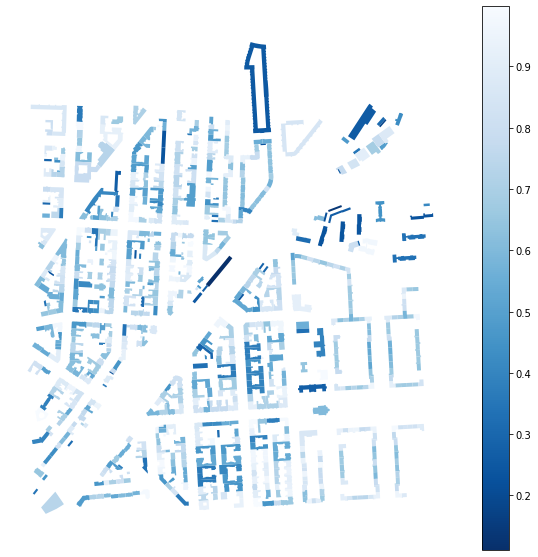

In [173]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='elongation', legend=True, cmap='Blues_r')
ax.set_axis_off()
plt.show()

In [178]:
blg_squareness = momepy.Squareness(buildings)
buildings['squareness'] = blg_squareness.series

100%|██████████| 782/782 [00:00<00:00, 1289.87it/s]


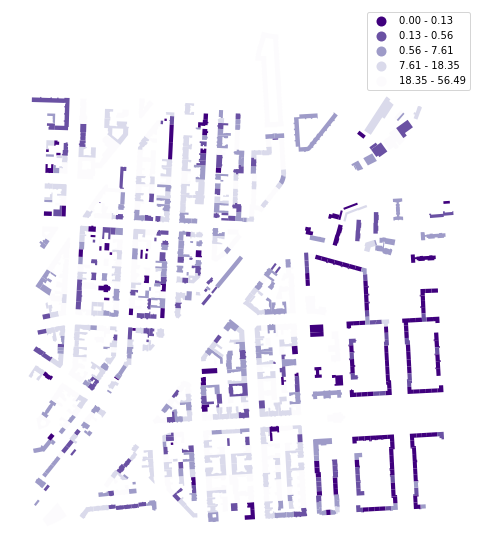

In [179]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='squareness', legend=True, scheme='quantiles', cmap='Purples_r')
ax.set_axis_off()
plt.show()

In [180]:
import numpy as np
blg_volume = momepy.Volume(buildings, np.random.randint(4, 20, size=len(buildings)))
buildings['formfactor'] = momepy.FormFactor(buildings, volumes=blg_volume.series).series

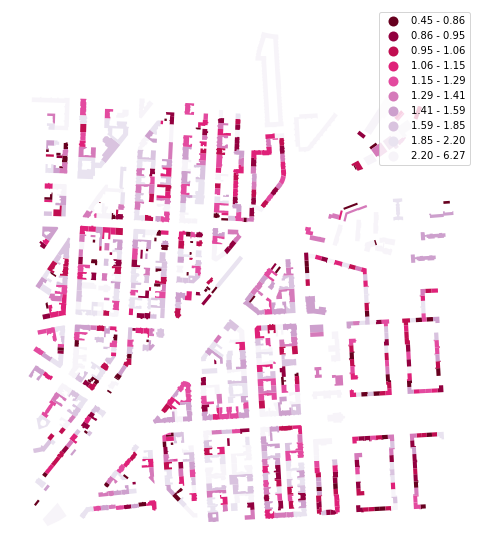

In [181]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='formfactor', legend=True, scheme='quantiles', k=10, cmap='PuRd_r')
ax.set_axis_off()
plt.show()

In [182]:
tes_cwa = momepy.CompactnessWeightedAxis(tessellation)
tessellation['cwa'] = tes_cwa.series

AttributeError: 'Tessellation' object has no attribute 'copy'

AttributeError: 'Tessellation' object has no attribute 'plot'

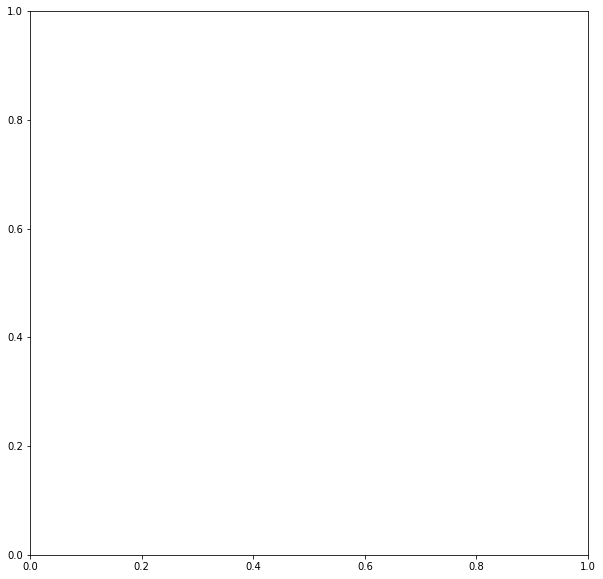

In [183]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='cwa', legend=True, scheme='quantiles', k=10, cmap='Greens_r')
ax.set_axis_off()
plt.show()

In [47]:
streets_graph = ox.graph_from_place('Steglitz, Berlin,Germany', network_type='drive')
streets_graph = ox.project_graph(streets_graph)

In [48]:
edges = ox.save_load.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, color='pink')
buildings.plot(ax=ax, color='lightgrey')
ax.set_axis_off()
plt.show()

In [50]:
edg_lin = momepy.Linearity(edges)
edges['linearity'] = edg_lin.series

100%|██████████| 1303/1303 [00:00<00:00, 11322.31it/s]


In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, column='linearity', legend=True, cmap='coolwarm_r', scheme='quantiles', k=4)
buildings.plot(ax=ax, color='lightgrey')
ax.set_axis_off()
plt.show()

In [52]:
gdf = ox.footprints.footprints_from_place(place='Steglitz, Berlin,Germany')
gdf_projected = ox.project_gdf(gdf)

buildings = momepy.preprocess(gdf_projected, size=30,
                              compactness=True, islands=True)
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)
tessellation = momepy.Tessellation(buildings, unique_id='uID', limit=limit).tessellation

Loop 1 out of 2.


Changing geometry: 100%|██████████| 249/249 [00:04<00:00, 56.28it/s]


Loop 2 out of 2.


Changing geometry: 100%|██████████| 29/29 [00:00<00:00, 58.65it/s]


Inward offset...
Discretization...


  1%|          | 53/4870 [00:00<00:22, 216.64it/s]

Generating input point array...


100%|██████████| 4870/4870 [00:11<00:00, 408.61it/s]


Generating Voronoi diagram...
Generating GeoDataFrame...


Vertices to Polygons: 100%|██████████| 733557/733557 [00:18<00:00, 38820.55it/s]


Dissolving Voronoi polygons...
Preparing limit for edge resolving...
Building R-tree...


 18%|█▊        | 45/253 [00:00<00:00, 443.77it/s]

Identifying edge cells...


 30%|██▉       | 85/287 [00:00<00:00, 849.24it/s]

Cutting...


100%|██████████| 287/287 [00:00<00:00, 856.06it/s]
C:\Users\Alex\anaconda3\lib\site-packages\momepy\elements.py:437: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should be edited. unique_id of affected elements: [75]
  "unique_id of affected elements: {}".format(list(uids))


In [54]:
streets_graph = ox.graph_from_place('Steglitz, Berlin,Germany', network_type='drive')
streets_graph = ox.project_graph(streets_graph)
edges = ox.save_load.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

In [176]:
buildings['orientation'] = momepy.Orientation(buildings).series
tessellation['orientation'] = momepy.Orientation(tessellation).series

100%|██████████| 782/782 [00:00<00:00, 1607.92it/s]


AttributeError: 'Tessellation' object has no attribute 'geometry'

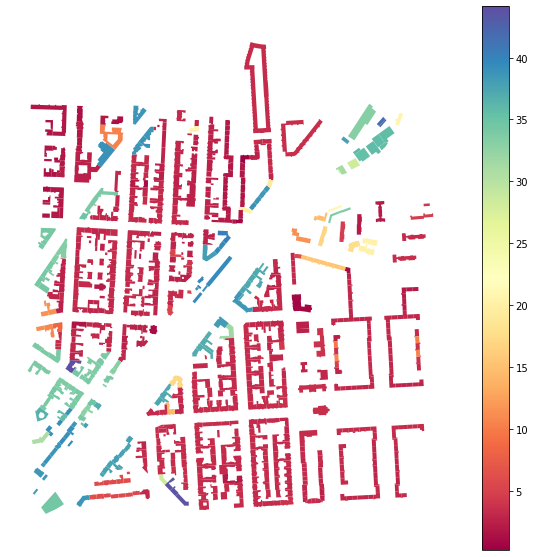

In [177]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='orientation', legend=True, cmap='Spectral')
ax.set_axis_off()
plt.show()

In [57]:
blg_cell_align = momepy.CellAlignment(buildings, tessellation,
                                      'orientation', 'orientation',
                                      'uID', 'uID')
buildings['cell_align'] = blg_cell_align.series

KeyError: 'cell_align'

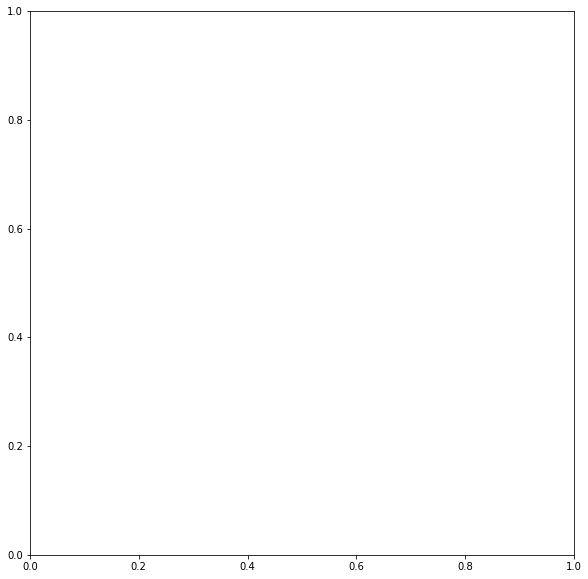

In [184]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='cell_align', legend=True, cmap='Reds')
ax.set_axis_off()
plt.show()

In [185]:
edges['networkID'] = momepy.unique_id(edges)
buildings['networkID'] = momepy.get_network_id(buildings, edges,
                                               'networkID')

Snapping:  53%|█████▎    | 417/782 [00:00<00:00, 4166.36it/s]

Generating centroids...
Generating rtree...


Snapping: 100%|██████████| 782/782 [00:00<00:00, 4270.22it/s]
C:\Users\Alex\anaconda3\lib\site-packages\momepy\elements.py:724: UserWarning: Some objects were not attached to the network. Set larger min_size. 520 affected elements
  "Set larger min_size. {} affected elements".format(sum(series.isnull()))


In [186]:
buildings_net = buildings.loc[buildings.networkID >= 0]

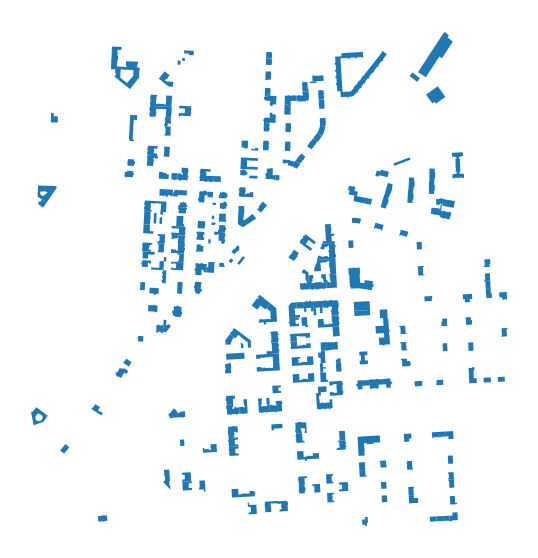

In [187]:
f, ax = plt.subplots(figsize=(10, 10))
buildings_net.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [188]:
str_align = momepy.StreetAlignment(buildings_net, edges,
                                   'orientation', 'networkID',
                                   'networkID')
buildings_net['str_align'] = str_align.series

100%|██████████| 108/108 [00:00<00:00, 26971.41it/s]
C:\Users\Alex\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


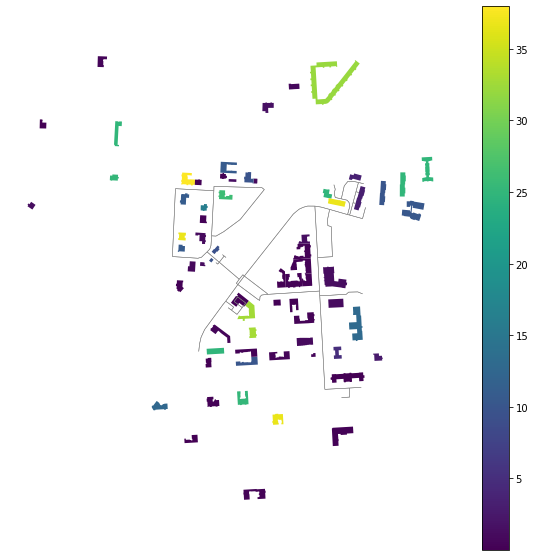

In [189]:
f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, color='grey', linewidth=0.5)
buildings_net.plot(ax=ax, column='str_align', legend=True)
ax.set_axis_off()
plt.show()

In [69]:
point = (52.469501, 13.341690)
dist = 1000  
gdf = ox.footprints.footprints_from_point(point, distance=dist)
buildings = ox.project_gdf(gdf)
buildings = buildings.explode()
buildings.reset_index(inplace=True, drop=True)

In [70]:
streets_graph = ox.graph_from_point(point, distance=dist, network_type='drive')
streets_graph = ox.project_graph(streets_graph)
edges = ox.save_load.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

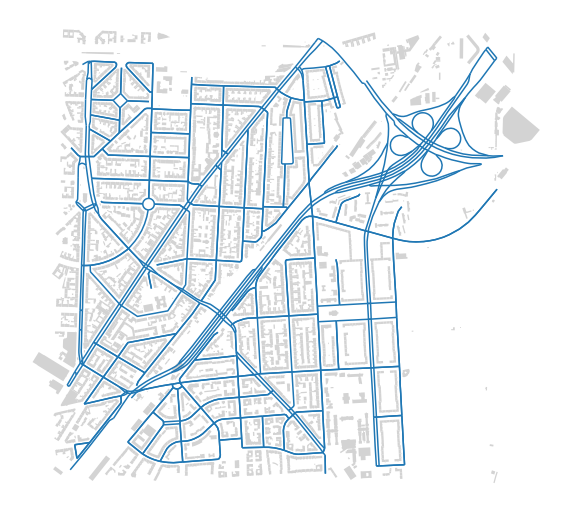

In [71]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, color='lightgrey')
edges.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [84]:
profile = momepy.StreetProfile(edges, buildings, heights='height')

100%|██████████| 663/663 [00:58<00:00, 11.32it/s]


In [85]:
edges['widths'] = profile.w
edges['width_deviations'] = profile.wd
edges['openness'] = profile.o
edges['heights'] = profile.h
edges['heights_deviations'] = profile.hd
edges['profile'] = profile.p

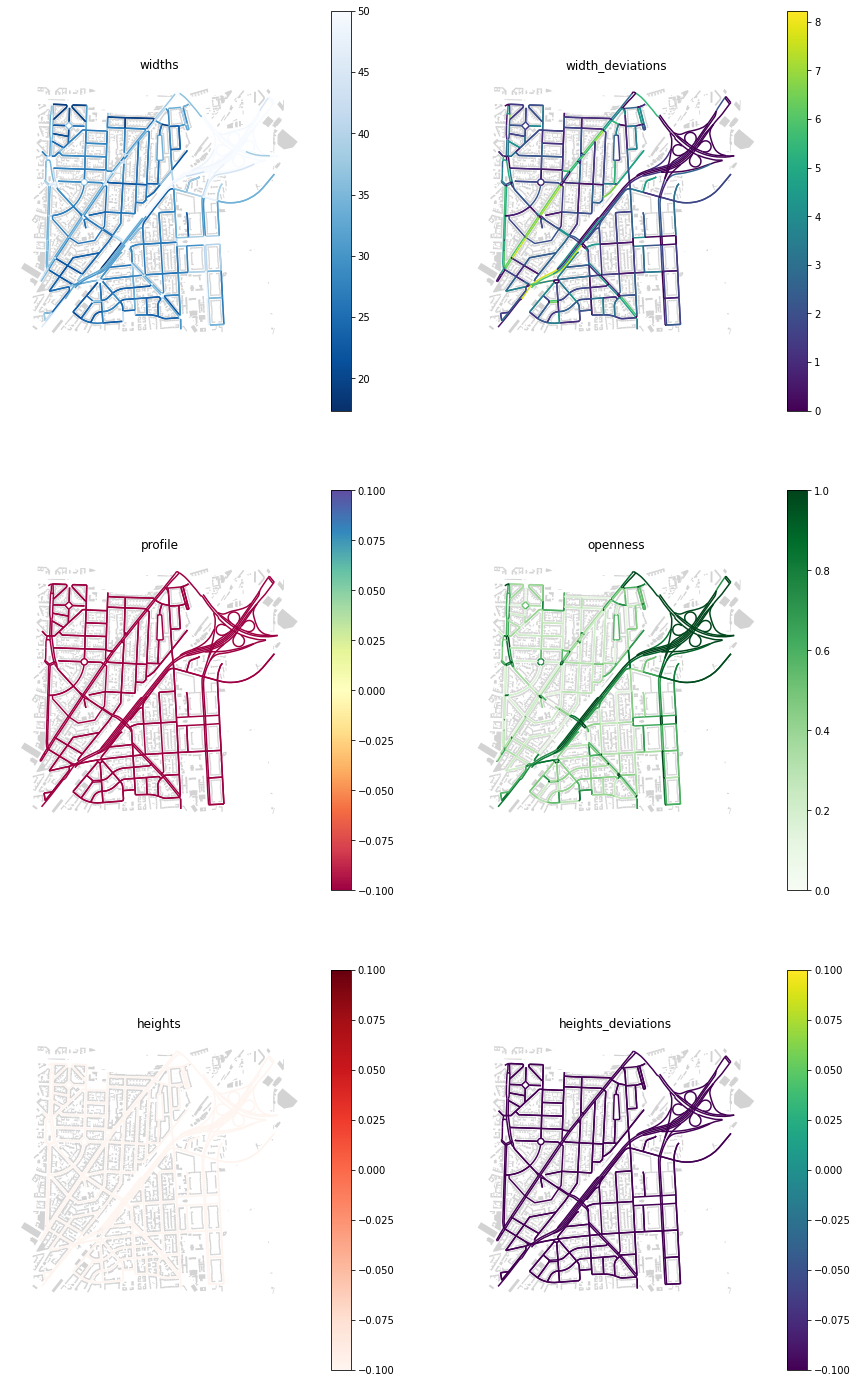

In [86]:
f, axes = plt.subplots(figsize=(15, 25), ncols=2, nrows=3)
edges.plot(ax=axes[0][0], column='widths', legend=True, cmap='Blues_r')
buildings.plot(ax=axes[0][0], color='lightgrey')
edges.plot(ax=axes[0][1], column='width_deviations', legend=True)
buildings.plot(ax=axes[0][1], color='lightgrey')
axes[0][0].set_axis_off()
axes[0][0].set_title('widths')
axes[0][1].set_axis_off()
axes[0][1].set_title('width_deviations')
edges.plot(ax=axes[1][0], column='profile', legend=True, cmap='Spectral')
buildings.plot(ax=axes[1][0], color='lightgrey')
edges.plot(ax=axes[1][1], column='openness', legend=True, cmap='Greens')
buildings.plot(ax=axes[1][1], color='lightgrey')
axes[1][0].set_axis_off()
axes[1][0].set_title('profile')
axes[1][1].set_axis_off()
axes[1][1].set_title('openness')
edges.plot(ax=axes[2][0], column='heights', legend=True, cmap='Reds')
buildings.plot(ax=axes[2][0], color='lightgrey')
edges.plot(ax=axes[2][1], column='heights_deviations', legend=True)
buildings.plot(ax=axes[2][1], color='lightgrey')
axes[2][0].set_axis_off()
axes[2][0].set_title('heights')
axes[2][1].set_axis_off()
axes[2][1].set_title('heights_deviations')
plt.show()

In [78]:
point = (40.731603, -73.977857)
dist = 1000
gdf = ox.footprints.footprints_from_point(point, distance=dist)
buildings = ox.project_gdf(gdf)
buildings['height'] = buildings['height'].fillna(0).astype(float)
buildings = buildings.explode()
buildings.reset_index(inplace=True, drop=True)

In [83]:
streets_graph = ox.graph_from_point(point, distance=dist, network_type='drive')
streets_graph = ox.project_graph(streets_graph)
edges = ox.save_load.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

In [81]:
buildings['height']

0       37.5
1       37.5
2        0.0
3       43.0
4       43.0
        ... 
3196    18.8
3197     3.1
3198    19.9
3199    53.7
3200    50.0
Name: height, Length: 3201, dtype: float64